In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn import metrics
from nltk.corpus import stopwords

from models import try_model

In [2]:
df = pd.read_csv('data_5000_mayus.csv')

In [3]:
X = df.Cuerpo

In [4]:
y = df.Periódico.astype('category')

In [5]:
from sklearn.model_selection import train_test_split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1)

In [6]:
y_train_final.value_counts()

El Mundo Today    1388
ElMundo           1298
El País            885
HayNoticia.es      838
ElDiario.es         72
Name: Periódico, dtype: int64

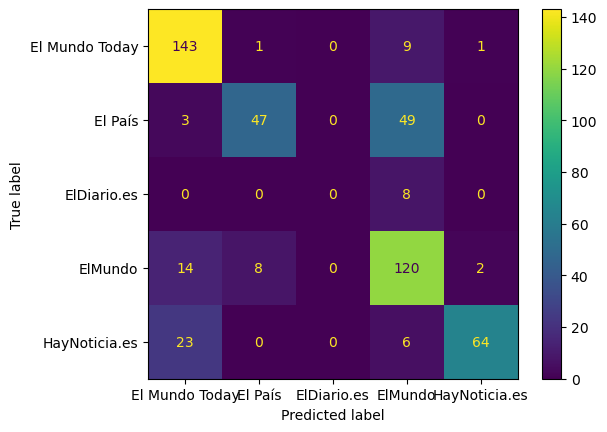

accuracy en train: 0.8165588038384289, accuracy en test: 0.751004016064257


In [7]:
data = [X_train_final, X_test_final, y_train_final, y_test_final]
M = LogisticRegression(C = 0.2, max_iter = 20000)

try_model(M, data, text = True, cm = True)

In [8]:
X_train_final = X_train_final.reset_index(drop = True)
X_test_final = X_test_final.reset_index(drop = True)
y_train_final = y_train_final.reset_index(drop = True)
y_test_final = y_test_final.reset_index(drop = True)

In [9]:
X_train_final.to_csv('X_train_final.csv', index = False)
X_test_final.to_csv('X_test_final.csv', index = False)
y_train_final.to_csv('y_train_final.csv', index = False)
y_test_final.to_csv('y_test_final.csv', index = False)

In [10]:
# UNA VEZ COMPROBADO QUE TODO FUNCIONA BIEN, ENTRENAMOS DE NUEVO EL MODELO AHORA FUERA DE LA FUNCION PARA PODER GUARDARLO JUNTO CON EL VECTORIZADOR

stopwords = stopwords.words('spanish')
vectorizer = TfidfVectorizer(max_features = 1000, stop_words = stopwords + ['si', 'según', 'tras'])
X_train_final_vect = vectorizer.fit_transform(X_train_final)
M.fit(X_train_final_vect, y_train_final)

LogisticRegression(C=0.2, max_iter=20000)

In [11]:
vectorizer

TfidfVectorizer(max_features=1000,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [12]:
# Guardo el objeto TF-IDF y la r. logistica

joblib.dump(vectorizer, 'tfidf_vectorizer1.pkl')
joblib.dump(M, 'regresion_logistica1.pkl')

['regresion_logistica1.pkl']

In [13]:
# los cargo con otro nombre para comprobar que funcione bien

tfidf = joblib.load('tfidf_vectorizer1.pkl')
logistic = joblib.load('regresion_logistica1.pkl')

In [14]:
X_test_final_vect = tfidf.transform(X_test_final)

In [15]:
y_pred_train_final = logistic.predict(X_train_final_vect) 
y_pred_final = logistic.predict(X_test_final_vect)
    
acc_train_final = metrics.accuracy_score(y_train_final, y_pred_train_final)
acc_test_final = metrics.accuracy_score(y_test_final, y_pred_final)

print(acc_train_final, acc_test_final)

0.8165588038384289 0.751004016064257
